<a href="https://colab.research.google.com/github/kanekalp/mpa-mlf/blob/main/exercise_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SVM for classification

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[:,:])
print(iris.target)
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3

In [ ]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

(120, 4)
(30, 4)
(120,)
(30,)
[1 2 1 2 1 2 0 2 1 1 0 2 1 1 0 1 2 0 2 1 0 1 1 2 2 0 2 2 2 2 1 1 0 2 1 2 1
 2 1 2 2 1 2 2 0 2 2 2 0 2 1 0 2 1 0 0 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 1 2 0
 1 0 2 1 2 1 1 2 1 0 0 2 0 0 0 0 1 1 1 0 0 0 1 2 1 0 0 0 1 1 1 1 2 1 0 2 0
 1 2 2 0 1 0 0 2 0]


In [ ]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
print(SVMmodel.get_params())
SVMmodel.score(X_test,y_test)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


0.9666666666666667

In [ ]:
X=iris.data[:,0:2]
X.shape

(150, 2)

In [ ]:
import matplotlib.pyplot as plt

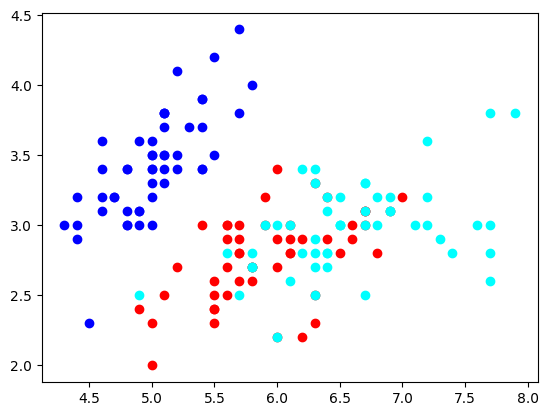

In [ ]:
plt.scatter(X[y==0,0],X[y==0,1],color='blue')
plt.scatter(X[y==1,0],X[y==1,1],color='red')
plt.scatter(X[y==2,0],X[y==2,1],color='cyan')

In [ ]:
X=iris.data[iris.target!=2,0:2]
y=iris.target[iris.target!=2]

SVMmodel=SVC(kernel='linear')

X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.2)
SVMmodel.fit(X_train1,y_train1)
SVMmodel.score(X_test1,y_test1)


1.0

In [ ]:

supvectors=SVMmodel.support_vectors_
# Plot the support vectors here


#Separating line coefficients:
W=SVMmodel.coef_[0]
b=SVMmodel.intercept_[0]

print(W, b)


[ 2.22288505 -2.22227875] -5.003249732566655


In [ ]:
import numpy as np

In [ ]:
print(np.min(W))

-2.2225850578739896


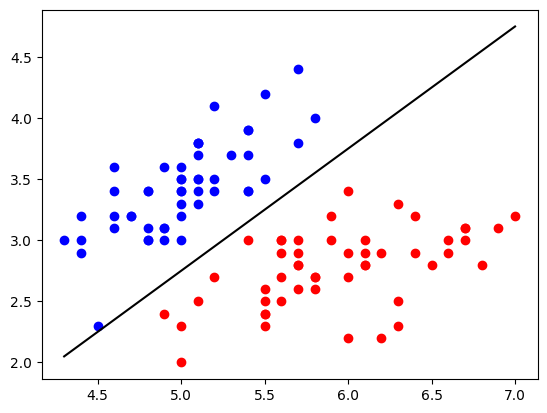

In [ ]:
plt.scatter(X[y==0,0],X[y==0,1],color='blue')
plt.scatter(X[y==1,0],X[y==1,1],color='red')


xval = np.linspace((X[:, 0]).min(), (X[:, 0]).max(), 100)
yval = - (W[0] * xval + b) / W[1]
plt.plot(xval, yval, color='black')

### Anomaly detection via SVM

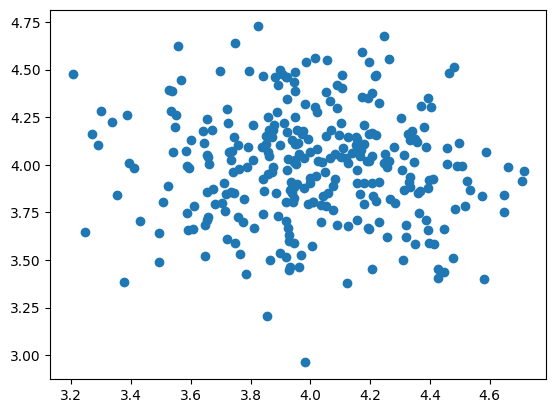

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()

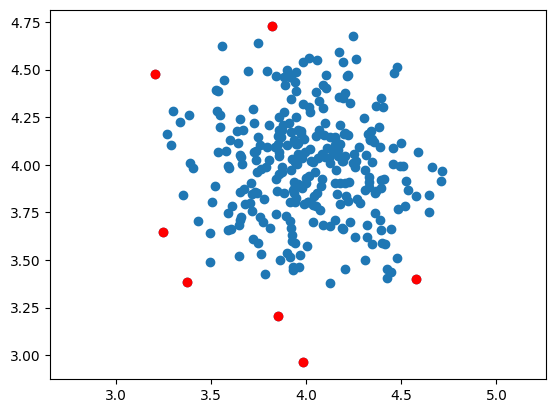

In [ ]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')

'''support_vectors = SVMmodelOne.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='green')'''

plt.show()

8.990230609448586


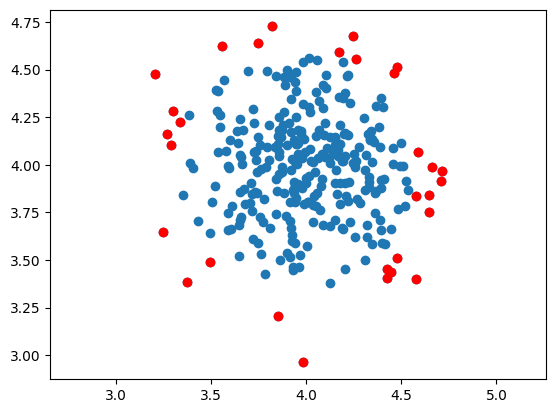

In [ ]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.1)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()